In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw

In [2]:
data = pd.read_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\S&S_SZD\Project_Data_EE4C12_S&S_SZD.csv')
data

Patient  annotation  min|FP1-F7  min|F7-T3  min|T3-T5  min|T5-O1  \
0          258           1          50         61         57         53   
1          258           1          48         62         60         46   
2          258           1          51         60         59         45   
3          258           1          49         58         56         42   
4          258           1          45         57         61         41   
...        ...         ...         ...        ...        ...        ...   
55451    11580          -1          75         73         81         80   
55452    11580          -1          74         74         77         71   
55453    11580          -1          72         76         72         73   
55454    11580          -1          77         82         74         75   
55455    11580          -1          71         79         74         78   

       min|FP2-F8  min|F8-T4  min|T4-T6  min|T6-O2  ...  norm_power_HF|CZ-C4  \
0              39         35         39         35  ...             0.016087   
1              38         35         39         33  ...             0.024006   
2              38         36         40         36  ...             0.037326   
3              36         36         41         37  ...             0.027546   
4              35         37         41         37  ...             0.036820   
...           ...        ...        ...        ...  ...                  ...   
55451          66         80         77         75  ...             0.244334   
55452          79         75         82         77  ...             0.588236   
55453          74         76         80         76  ...             0.296041   
55454          82         85         80         76  ...             0.440360   
55455          80         85         81         75  ...             1.019325   

       norm_power_HF|C4-T4  norm_power_HF|FP1-F3  norm_power_HF|F3-C3  \
0                 0.066920              0.102402             0.481384   
1                 0.064857              0.031791             0.225788   
2                 0.100177              0.050009             0.622584   
3                 0.107883              0.014017             0.359140   
4                 0.182520              0.031397             0.328354   
...                    ...                   ...                  ...   
55451             0.625396              0.023821             0.058277   
55452             0.743060              0.076294             0.332341   
55453             0.770194              0.041190             0.090919   
55454             0.720855              0.026959             0.026340   
55455             0.735140              0.030715             0.077191   

       norm_power_HF|C3-P3  norm_power_HF|P3-O1  norm_power_HF|FP2-F4  \
0                 0.690787             0.154544              0.062533   
1                 0.409987             0.184671              0.071133   
2                 0.394504             0.225516              0.050673   
3                 0.276964             0.104977              0.018042   
4                 0.156929             0.151952              0.047532   
...                    ...                  ...                   ...   
55451             0.083594             0.114426              0.119654   
55452             0.228458             0.170603              0.351418   
55453             0.186074             0.216797              0.231053   
55454             0.077674             0.269610              0.186769   
55455             0.095298             0.317765              0.271859   

       norm_power_HF|F4-C4  norm_power_HF|C4-P4  norm_power_HF|P4-O2  
0                 0.046460             0.066575             0.086999  
1                 0.022369             0.079494             0.047536  
2                 0.044906             0.102142             0.068105  
3                 0.079467             0.078255             0.089385  
4                 0.135071          

In [3]:
Patient_count = data['Patient'].value_counts(sort=False)

In [4]:
Patient_count

258        522
8889      3682
9578      4184
10158     1240
5804      1272
6175      4064
10418    13120
10591      996
11333     6480
5371      3365
4456      4069
6563      1965
10020     1452
6514      1786
11580     7259
Name: Patient, dtype: int64

In [5]:
Patient_ID = Patient_count.index.values
Patient_num = len(Patient_ID)
Patient_ID_inv = dict(zip(Patient_ID, range(Patient_num)))

In [6]:
itp_idx = []
itp_idx.append(0)
for i in range(1, len(data)):
    if data['Patient'][i] != data['Patient'][i-1]:
        itp_idx.append(i)
itp_idx.append(len(data))

In [7]:
data_list = []
for i in range(Patient_num):
    data_list.append([])    

for i in range(1, len(itp_idx)):
    data_temp = data.iloc[itp_idx[i-1]:itp_idx[i]]
    Patient_temp = data_temp['Patient'].iloc[0]
    data_list[Patient_ID_inv[Patient_temp]].append(data_temp)
    
for i in range(Patient_num):
    print(len(data_list[i]))

1
1
1
1
1
2
2
1
1
1
2
1
1
1
1


In [8]:
for i in range(Patient_num):
    print("Patient: {}".format(Patient_ID[i]))
    print("Number of series: {}".format(len(data_list[i])))
    for j in range(len(data_list[i])):
        print("Length of series {}: {}".format(j, len(data_list[i][j])))
    print('--'*20)

Patient: 258
Number of series: 1
Length of series 0: 522
----------------------------------------
Patient: 8889
Number of series: 1
Length of series 0: 3682
----------------------------------------
Patient: 9578
Number of series: 1
Length of series 0: 4184
----------------------------------------
Patient: 10158
Number of series: 1
Length of series 0: 1240
----------------------------------------
Patient: 5804
Number of series: 1
Length of series 0: 1272
----------------------------------------
Patient: 6175
Number of series: 2
Length of series 0: 1169
Length of series 1: 2895
----------------------------------------
Patient: 10418
Number of series: 2
Length of series 0: 7541
Length of series 1: 5579
----------------------------------------
Patient: 10591
Number of series: 1
Length of series 0: 996
----------------------------------------
Patient: 11333
Number of series: 1
Length of series 0: 6480
----------------------------------------
Patient: 5371
Number of series: 1
Length of serie

In [9]:
features = data.columns.values[1:]

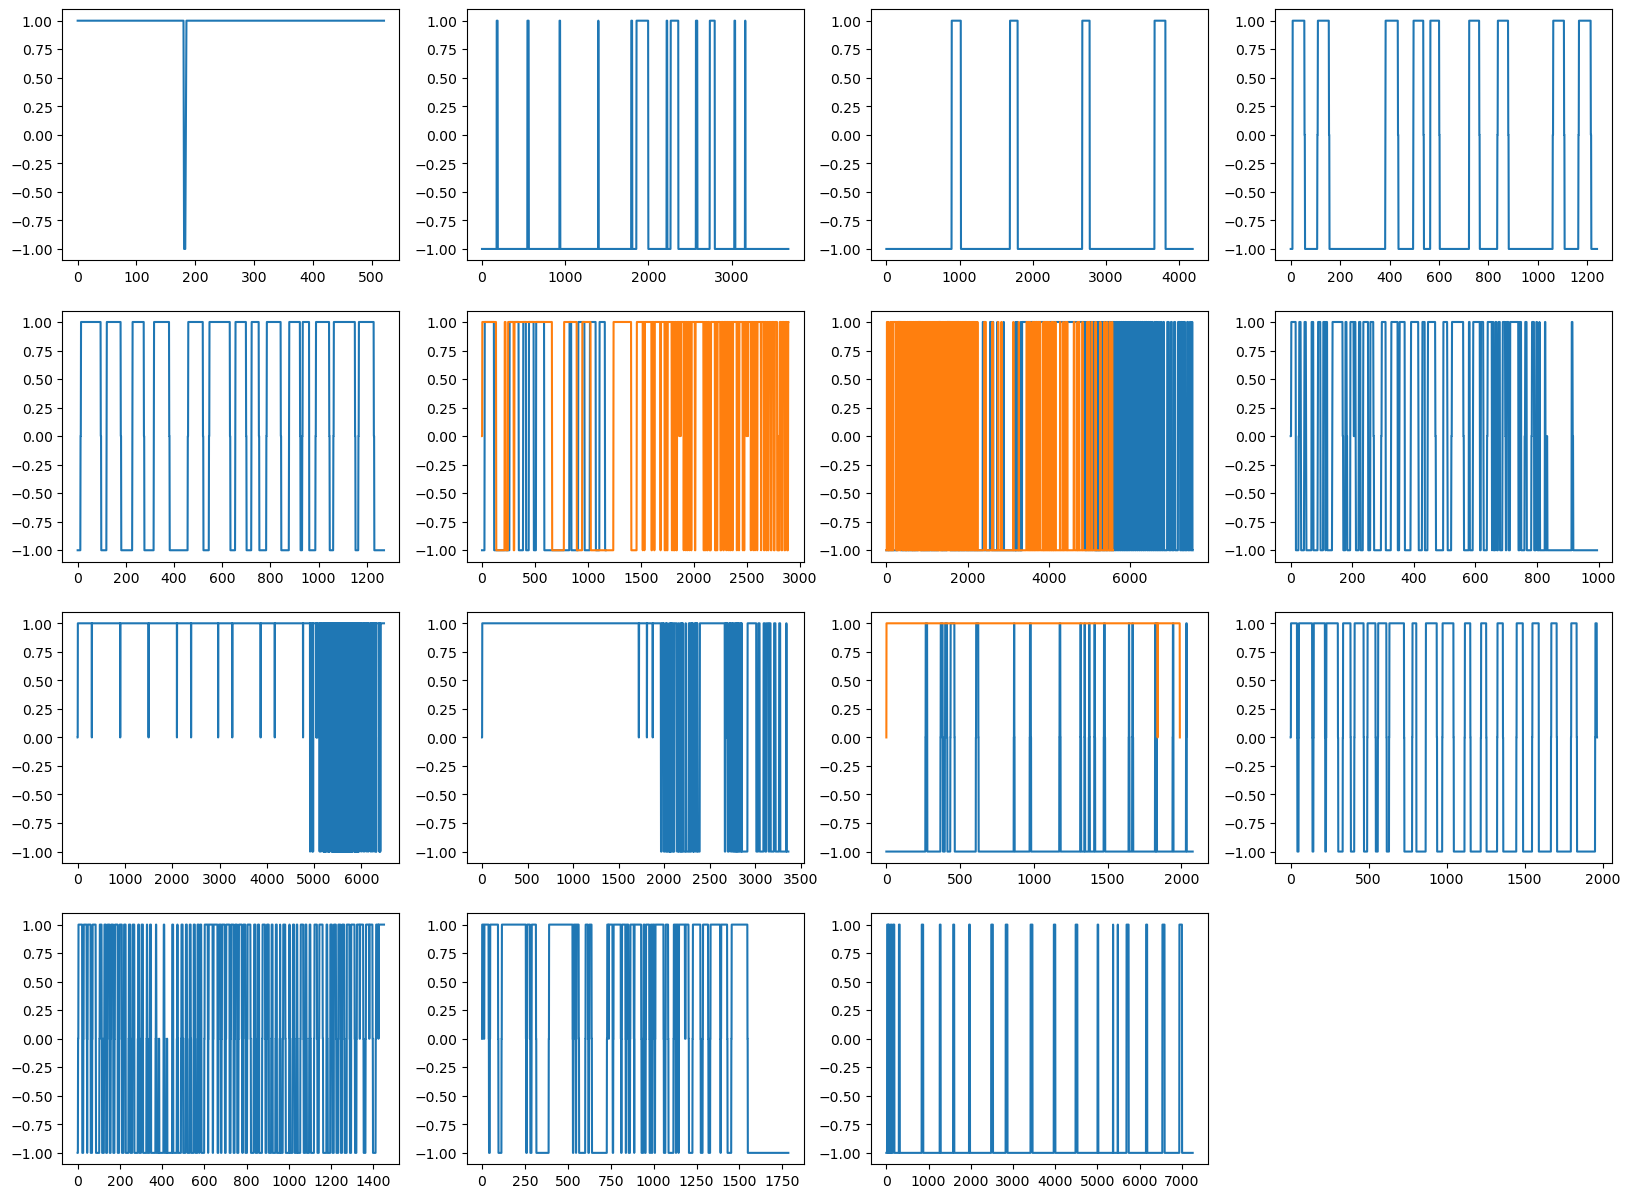

In [10]:
plt.figure(figsize=(20, 15))
for i in range(Patient_num):
    plt.subplot(4, 4, i+1)
    for j in range(len(data_list[i])):
        data_ann = data_list[i][j]['annotation']
        x_temp = np.arange(len(data_ann))
        plt.plot(x_temp, data_ann)

plt.show()

In [11]:
Patient_ID

array([  258,  8889,  9578, 10158,  5804,  6175, 10418, 10591, 11333,
        5371,  4456,  6563, 10020,  6514, 11580], dtype=int64)

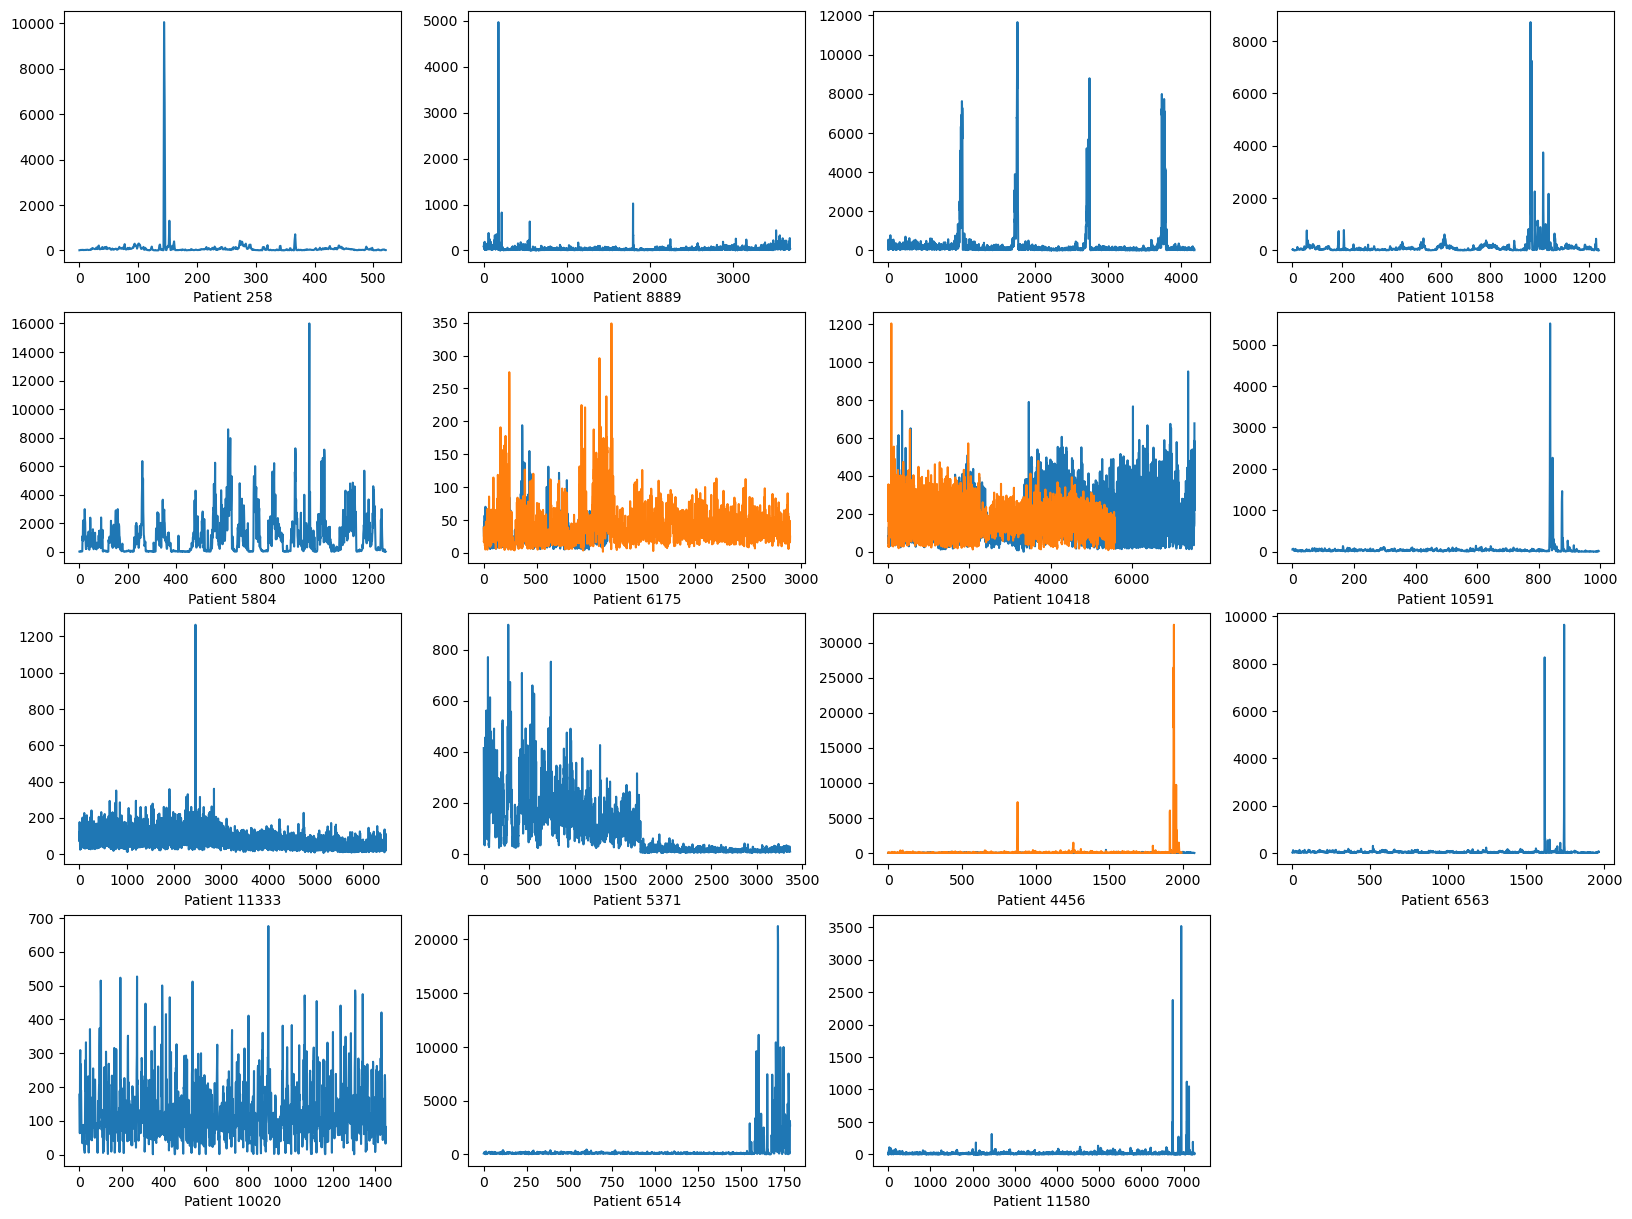

In [13]:
plt.figure(figsize=(20, 15))
for i in range(Patient_num):
    plt.subplot(4, 4, i+1)
    plt.xlabel("Patient "+str(Patient_ID[i]))
    for j in range(len(data_list[i])):
        data_ann = data_list[i][j][features[150]]
        x_temp = np.arange(len(data_ann))
        plt.plot(x_temp, data_ann)
        
plt.show()

In [54]:
X_anno = np.int32(data["annotation"].values).reshape(-1, 1)
X = data.iloc[:, 2:].values
X_scaled = np.zeros(X.shape)

In [55]:
for i in range(15):
    for j in range(len(data_list[i])):
        index = data_list[i][j].index
        X_search = X[index, :]
        scaler = StandardScaler().fit(X_search)
        X_search = scaler.transform(X_search)
        X_scaled[index, :] = X_search

In [61]:
def get_ts(X, data_list):
    num_ts = len(data_list)
    ts = []
    for i in range(num_ts):
        ts.append(X[data_list[i][0].index, :])
    ts.append(X[data_list[5][1].index, :])
    ts.append(X[data_list[6][1].index, :])
    ts.append(X[data_list[10][1].index, :])
    ts = to_time_series_dataset(ts)
    return ts

def get_subplots(ts, channel=0, label=None):
    
    for i in range(18):
        plt.subplot(4, 5, i+1)
        if(len(ts.shape)==2):
            plt.plot(ts[i, :])
        else:
            plt.plot(ts[i, :, channel])
    
    plt.show()

    if label != None:
        print("test")

In [59]:
ts = get_ts(X_scaled, data_list)

array([[[-0.1773422 ,  1.87812564,  0.613905  , ..., -0.62930913,
          0.8221243 ,  1.45013719],
        [-0.48903454,  2.05961057,  1.20046707, ..., -0.83258994,
          1.18838413,  0.26636046],
        [-0.02149602,  1.69664071,  1.00494638, ..., -0.64242018,
          1.8304872 ,  0.88338586],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-1.18139968,  0.0197328 , -1.29124007, ..., -0.61115018,
         -0.31696592, -0.49246064],
        [-0.98921051,  0.34849371, -0.98636356, ..., -0.61047951,
         -0.31279998, -0.51635788],
        [-0.89311593, -0.08985417, -1.18961457, ..., -0.6064975 ,
         -0.28304724, -0.5117857 ],
        ...,
        [        nan,         nan,         nan, ...,  

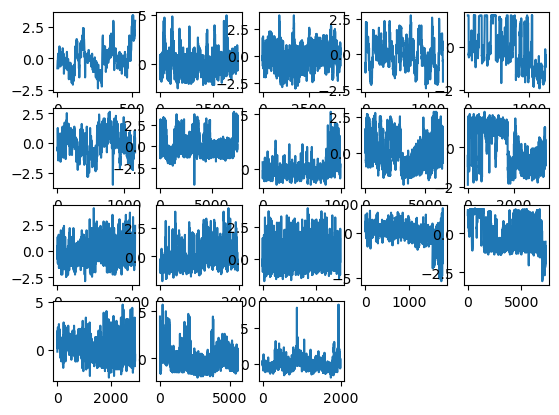

In [62]:
get_subplots(ts, 10)

In [65]:
ts = get_ts(X_anno, data_list)
ts.shape

(18, 7541, 1)

<Axes: >

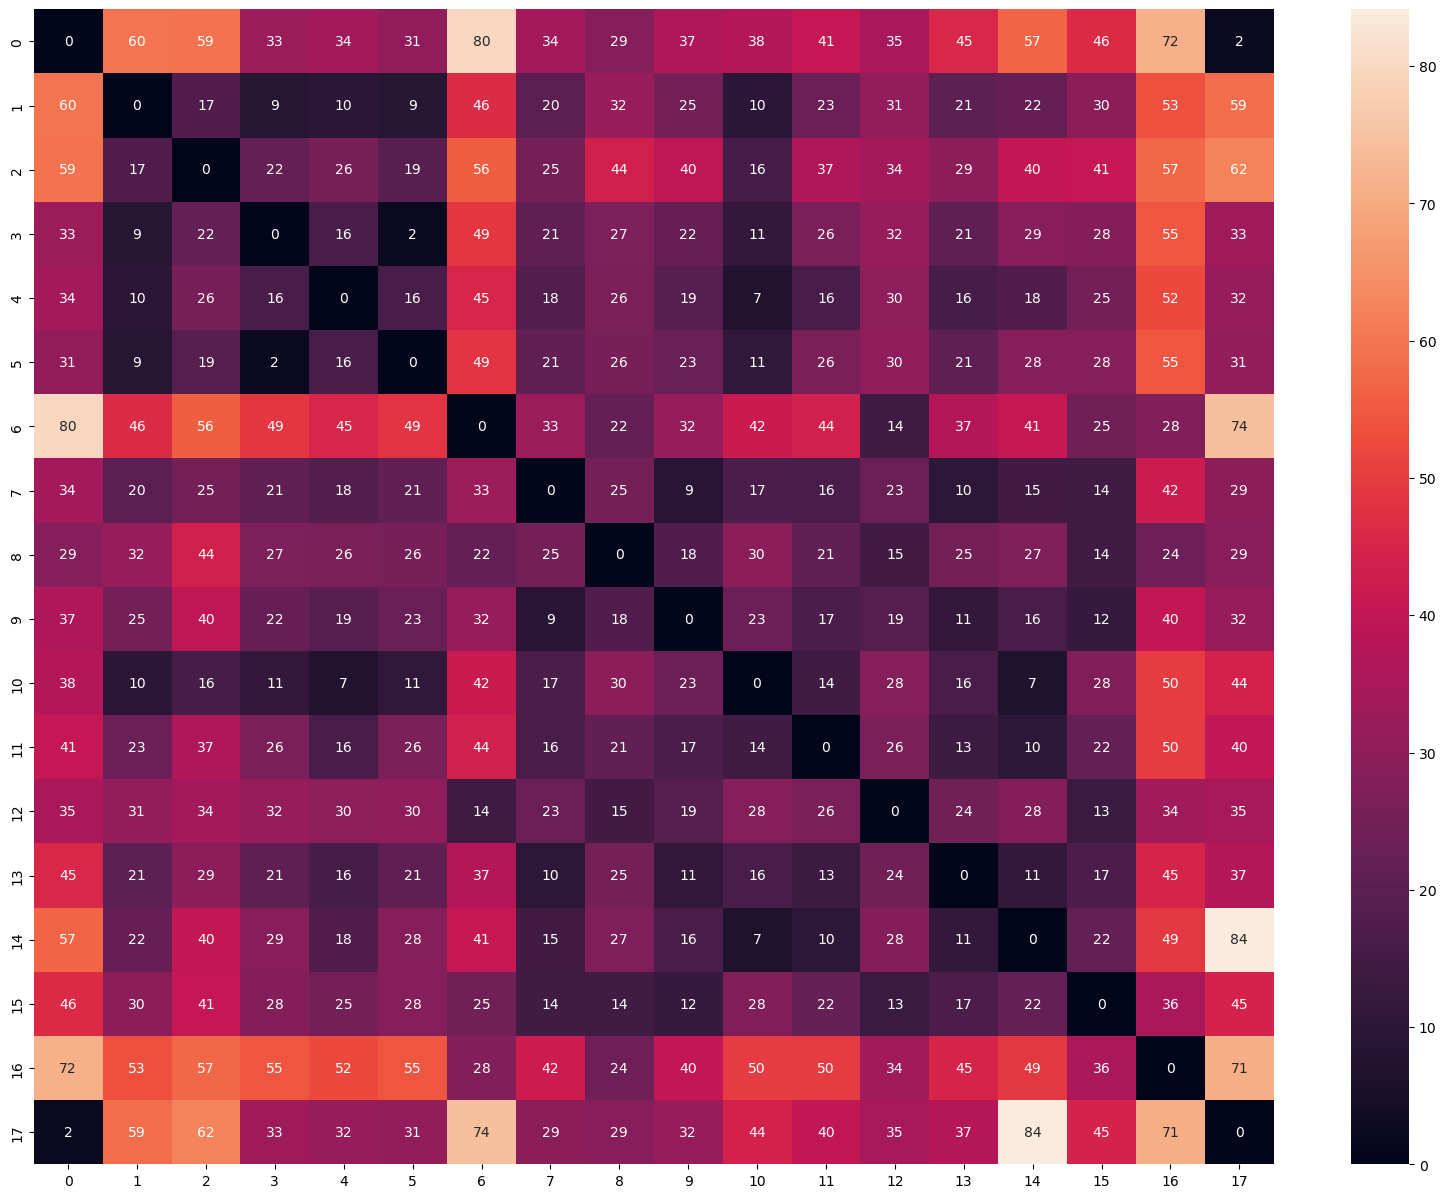

In [66]:
distance = np.zeros([18, 18])
for i in range(18):
    for j in range(i, 18):
        distance[i, j] = distance[j, i] = dtw(ts[i], ts[j])
plt.figure(figsize=(20, 15))
sns.heatmap(distance, annot=True, fmt='.0f')

In [67]:
n_clusters = 4
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=0, n_jobs=8)
y_pred = kmeans.fit_predict(ts)
print(y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:    2.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:    2.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:    7.9s finished


293.287 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:    5.2s finished


112.556 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:    5.3s finished


112.556 --> 


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s


[2 1 1 1 1 1 0 3 0 3 1 1 0 1 1 3 0 2]


[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:    5.3s finished


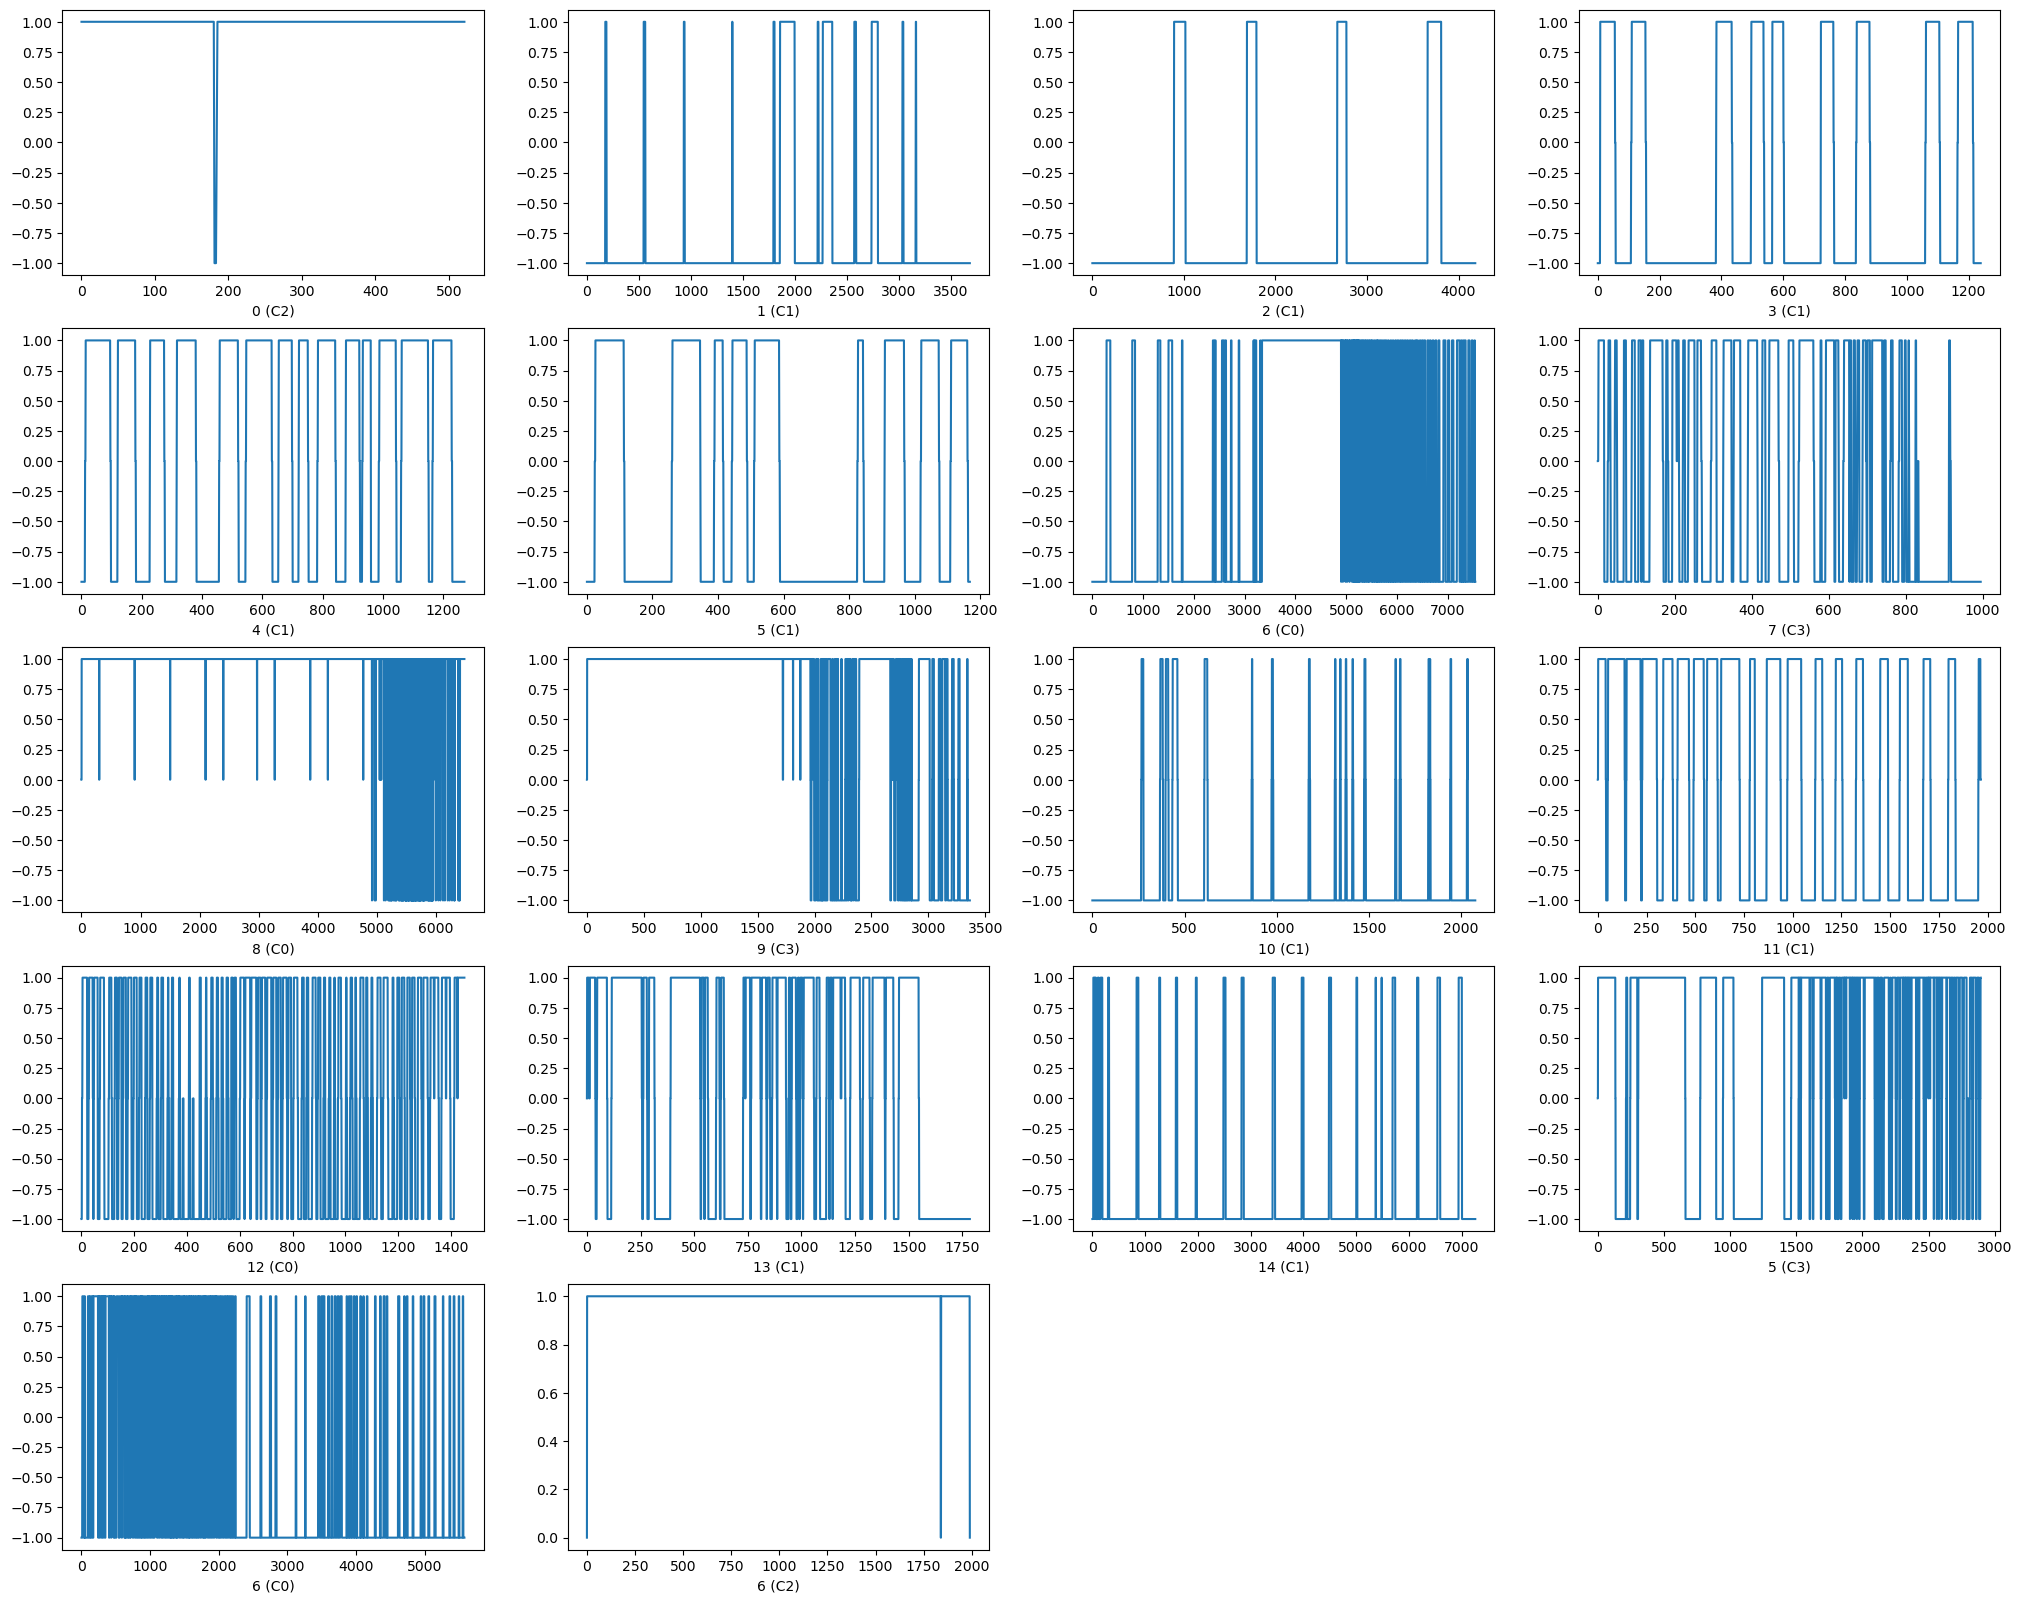

In [72]:
plt.figure(figsize=(25, 20))
for i in range(18):
    plt.subplot(5, 4, i+1)
    plt.plot(ts[i][:, 0])
    if i < 15:
        patient_idx_str = str(i)
    elif i==15:
        patient_idx_str = str(5)
    elif i==16:
        patient_idx_str = str(6)
    elif i==16:
        patient_idx_str = str(10)
    cluster_str = str(y_pred[i])
    plt.xlabel("{} (C{})".format(patient_idx_str, cluster_str))

In [70]:
silhouette_score(ts, y_pred, metric="dtw")

0.2733863331872508

In [73]:
ts = get_ts(X_scaled, data_list)

In [74]:
n_clusters = 4
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=0, n_jobs=8)
y_pred = kmeans.fit_predict(ts)
print(y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:   11.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   27.9s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   46.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   55.5s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   34.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:  3.0min finished


2710847.024 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:  2.7min finished


1201518.312 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:  2.8min finished


1201518.312 --> 


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.8min


[1 0 3 3 3 3 2 3 3 3 3 3 0 0 0 1 0 0]


[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:  3.8min finished


In [75]:
silhouette_score(ts, y_pred, metric="dtw")

-0.07372193328983526

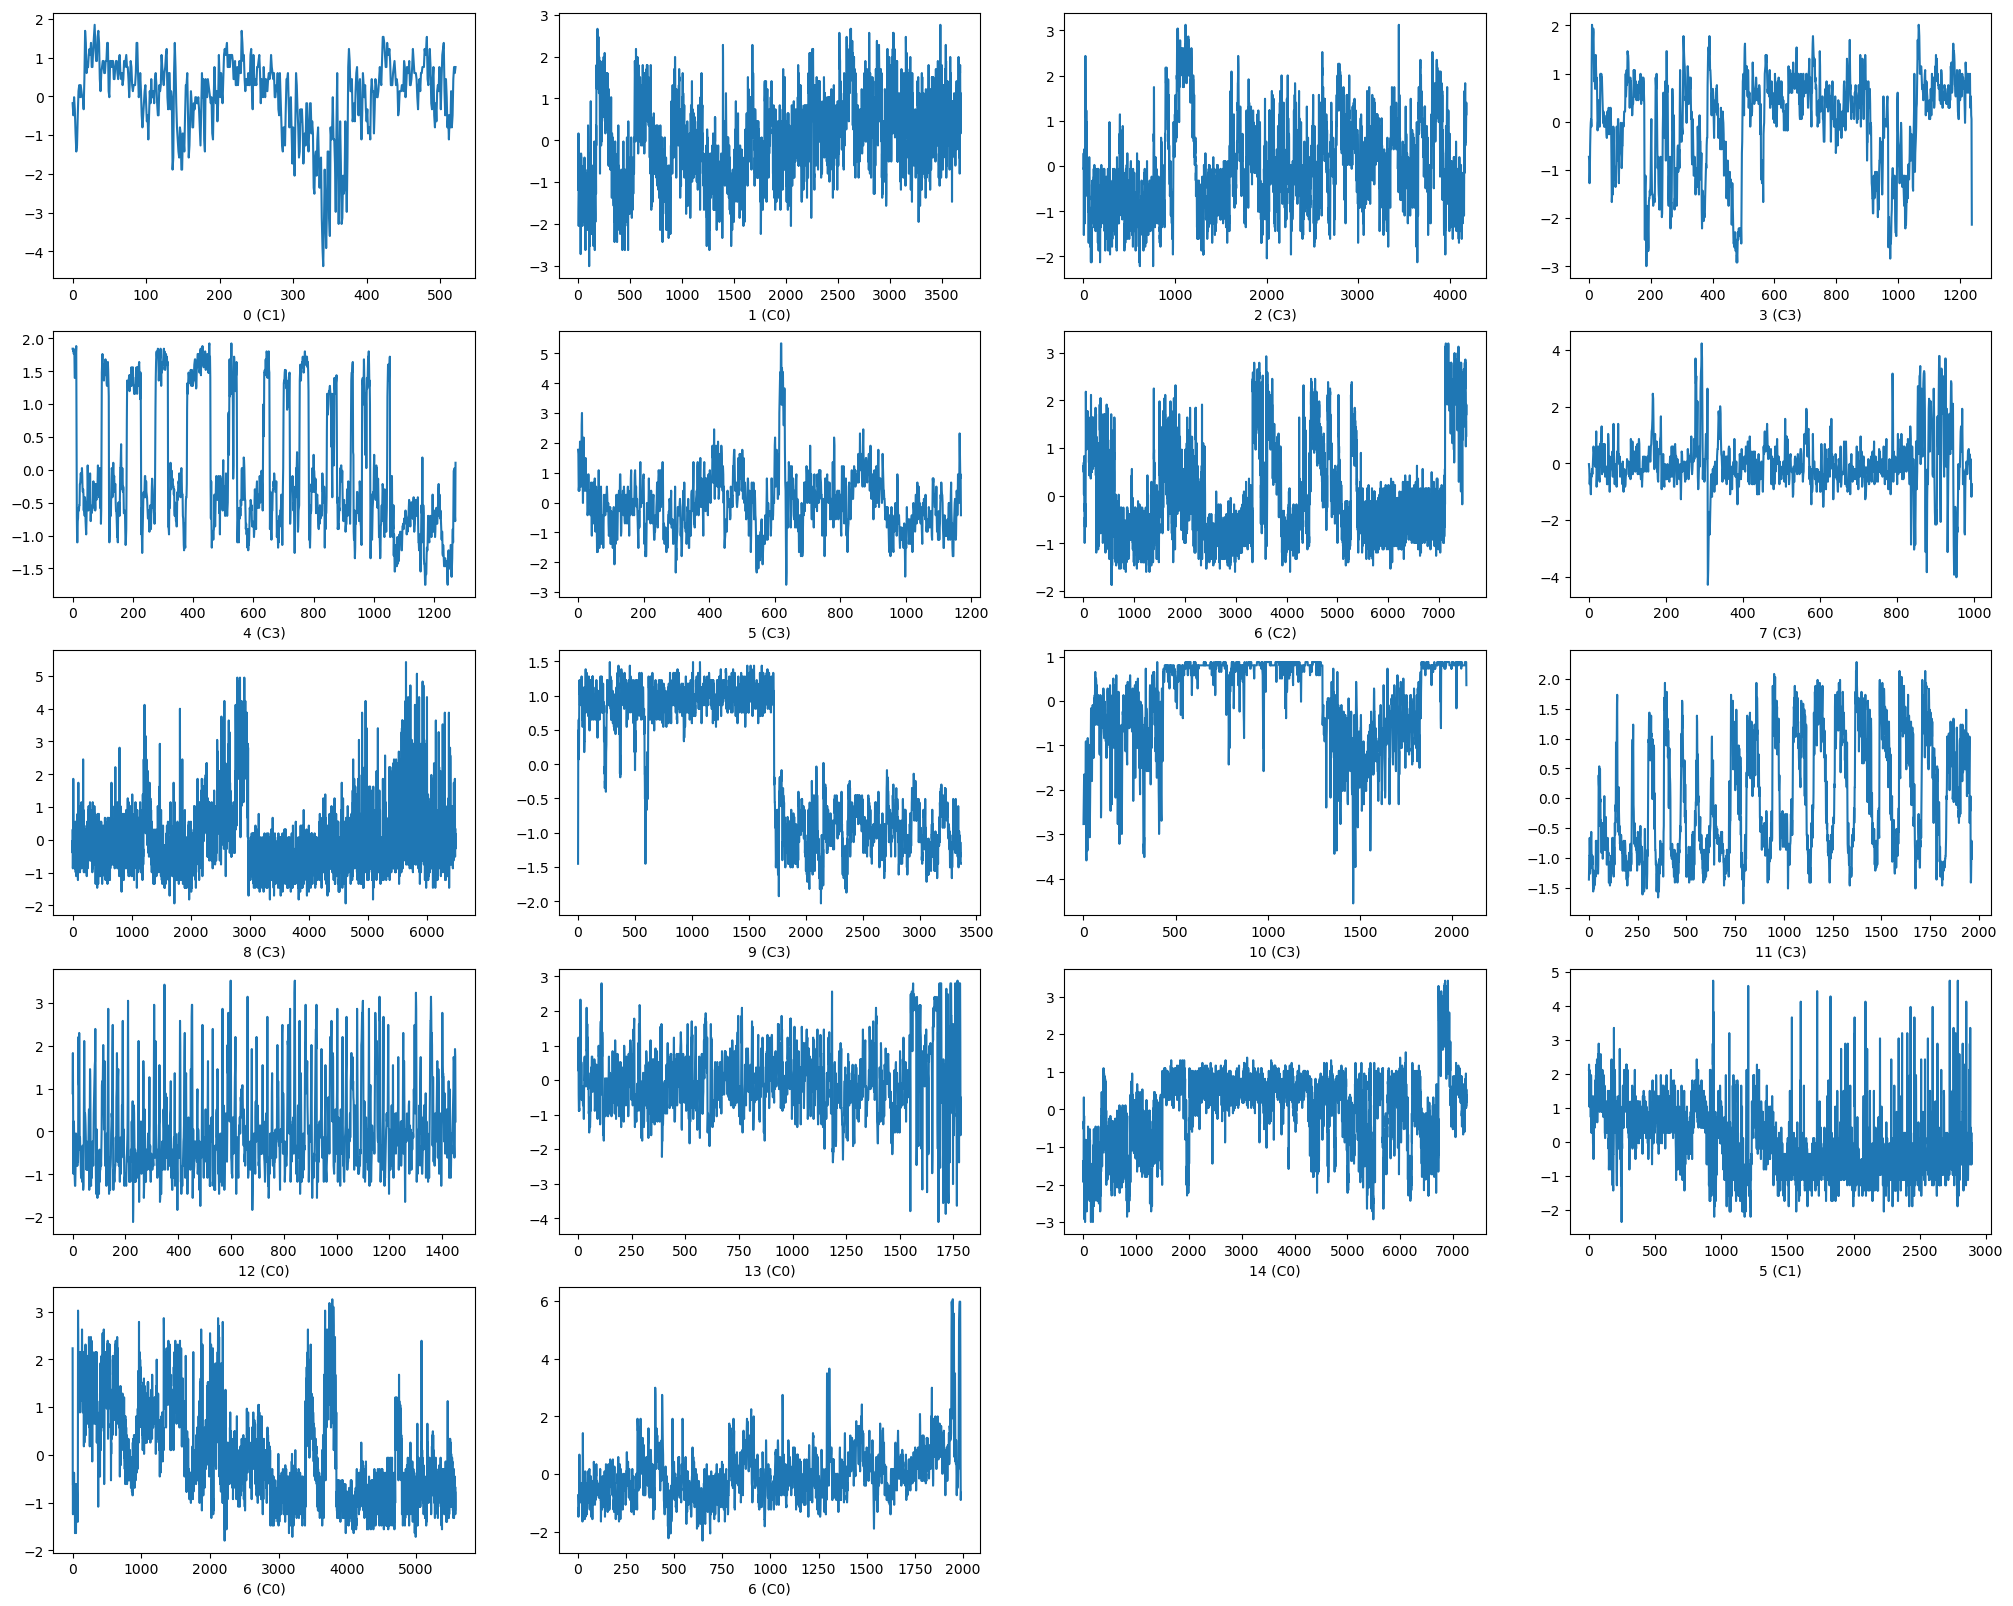

In [76]:
plt.figure(figsize=(25, 20))
for i in range(18):
    plt.subplot(5, 4, i+1)
    plt.plot(ts[i][:, 0])
    if i < 15:
        patient_idx_str = str(i)
    elif i==15:
        patient_idx_str = str(5)
    elif i==16:
        patient_idx_str = str(6)
    elif i==16:
        patient_idx_str = str(10)
    cluster_str = str(y_pred[i])
    plt.xlabel("{} (C{})".format(patient_idx_str, cluster_str))

In [ ]:
# Ends here

In [14]:
from sklearn.decomposition import PCA

X = data.iloc[:, 2:].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=32)
X_pca = pca.fit_transform(X_scaled)

In [15]:
X_pca.std()

2.8779082374897613

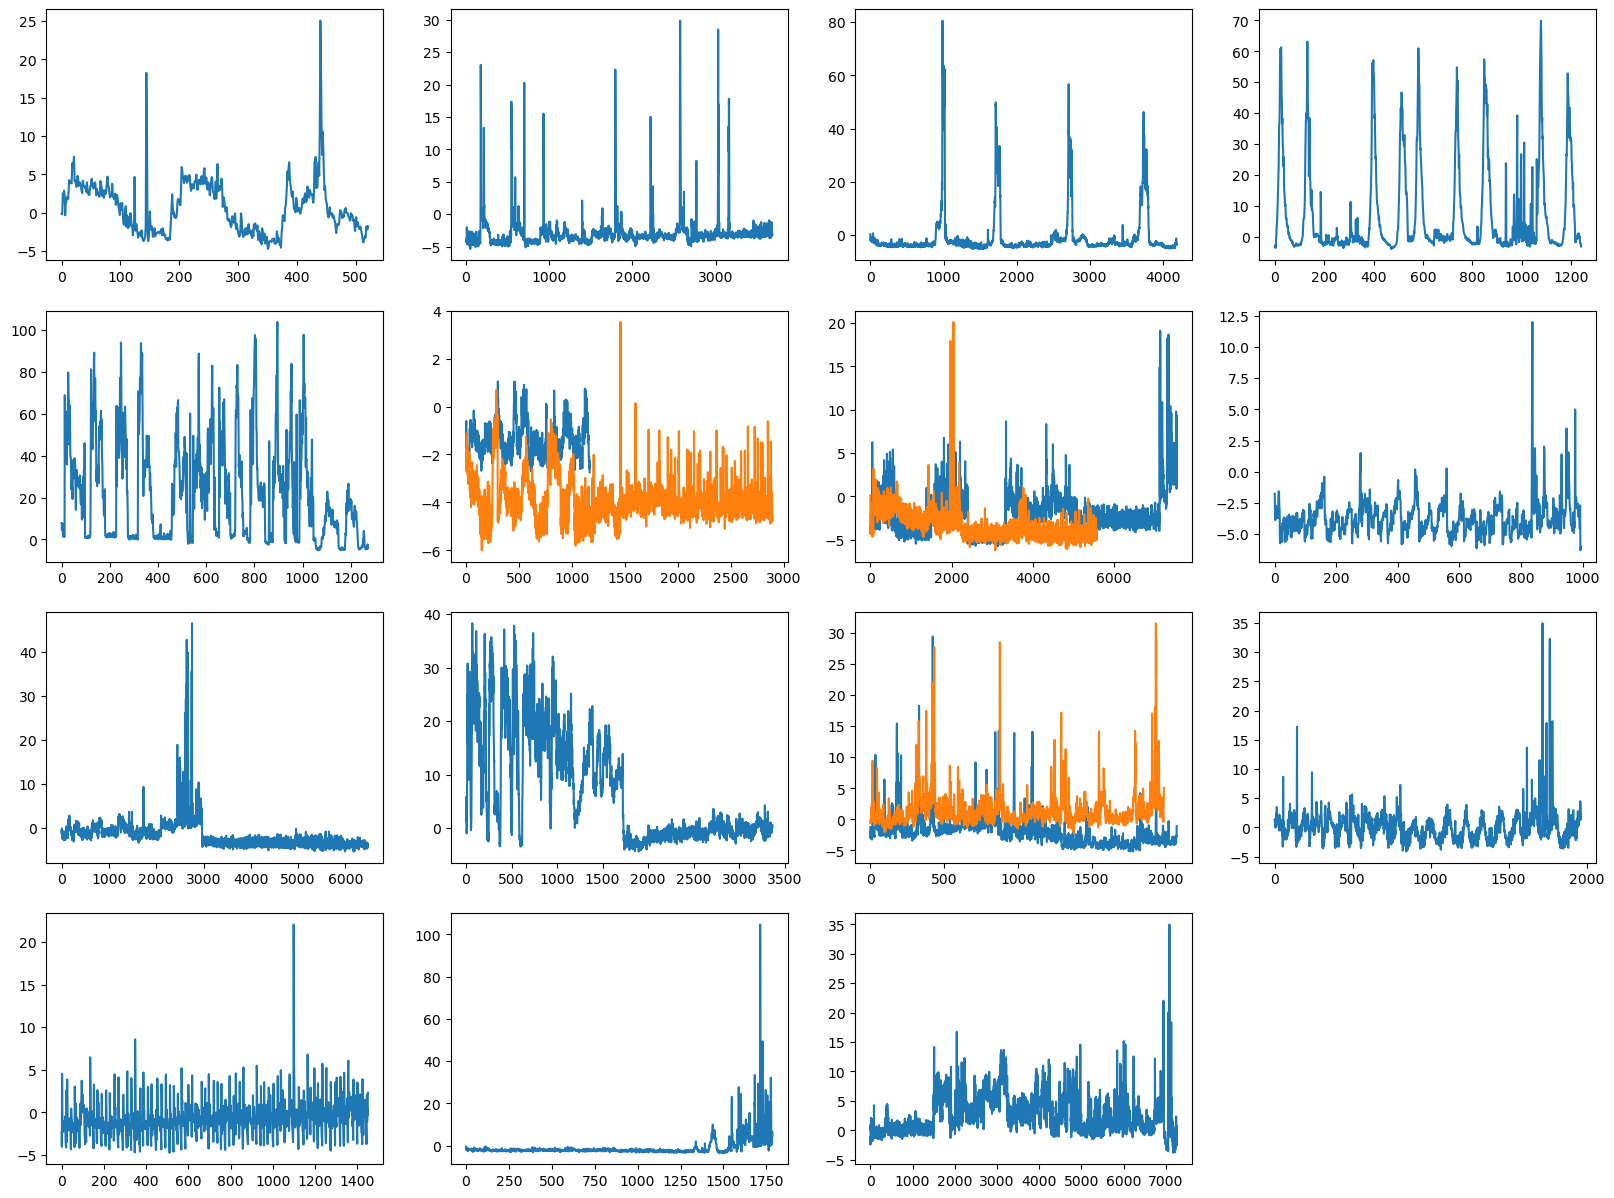

In [16]:
plt.figure(figsize=(20, 15))
for i in range(Patient_num):
    plt.subplot(4, 4, i+1)
    for j in range(len(data_list[i])):
        data_pca = X_pca[data_list[i][j].index, 0]
        x_temp = np.arange(len(data_pca))
        plt.plot(x_temp, data_pca)

In [17]:
X_pca.shape

(55456, 32)

In [18]:
ts = []
for i in range(15):
    ts.append(X_pca[data_list[i][0].index, :])
    
ts.append(X_pca[data_list[5][1].index, :])
ts.append(X_pca[data_list[6][1].index, :])
ts.append(X_pca[data_list[10][1].index, :])

In [19]:
ts[0].shape

(522, 32)

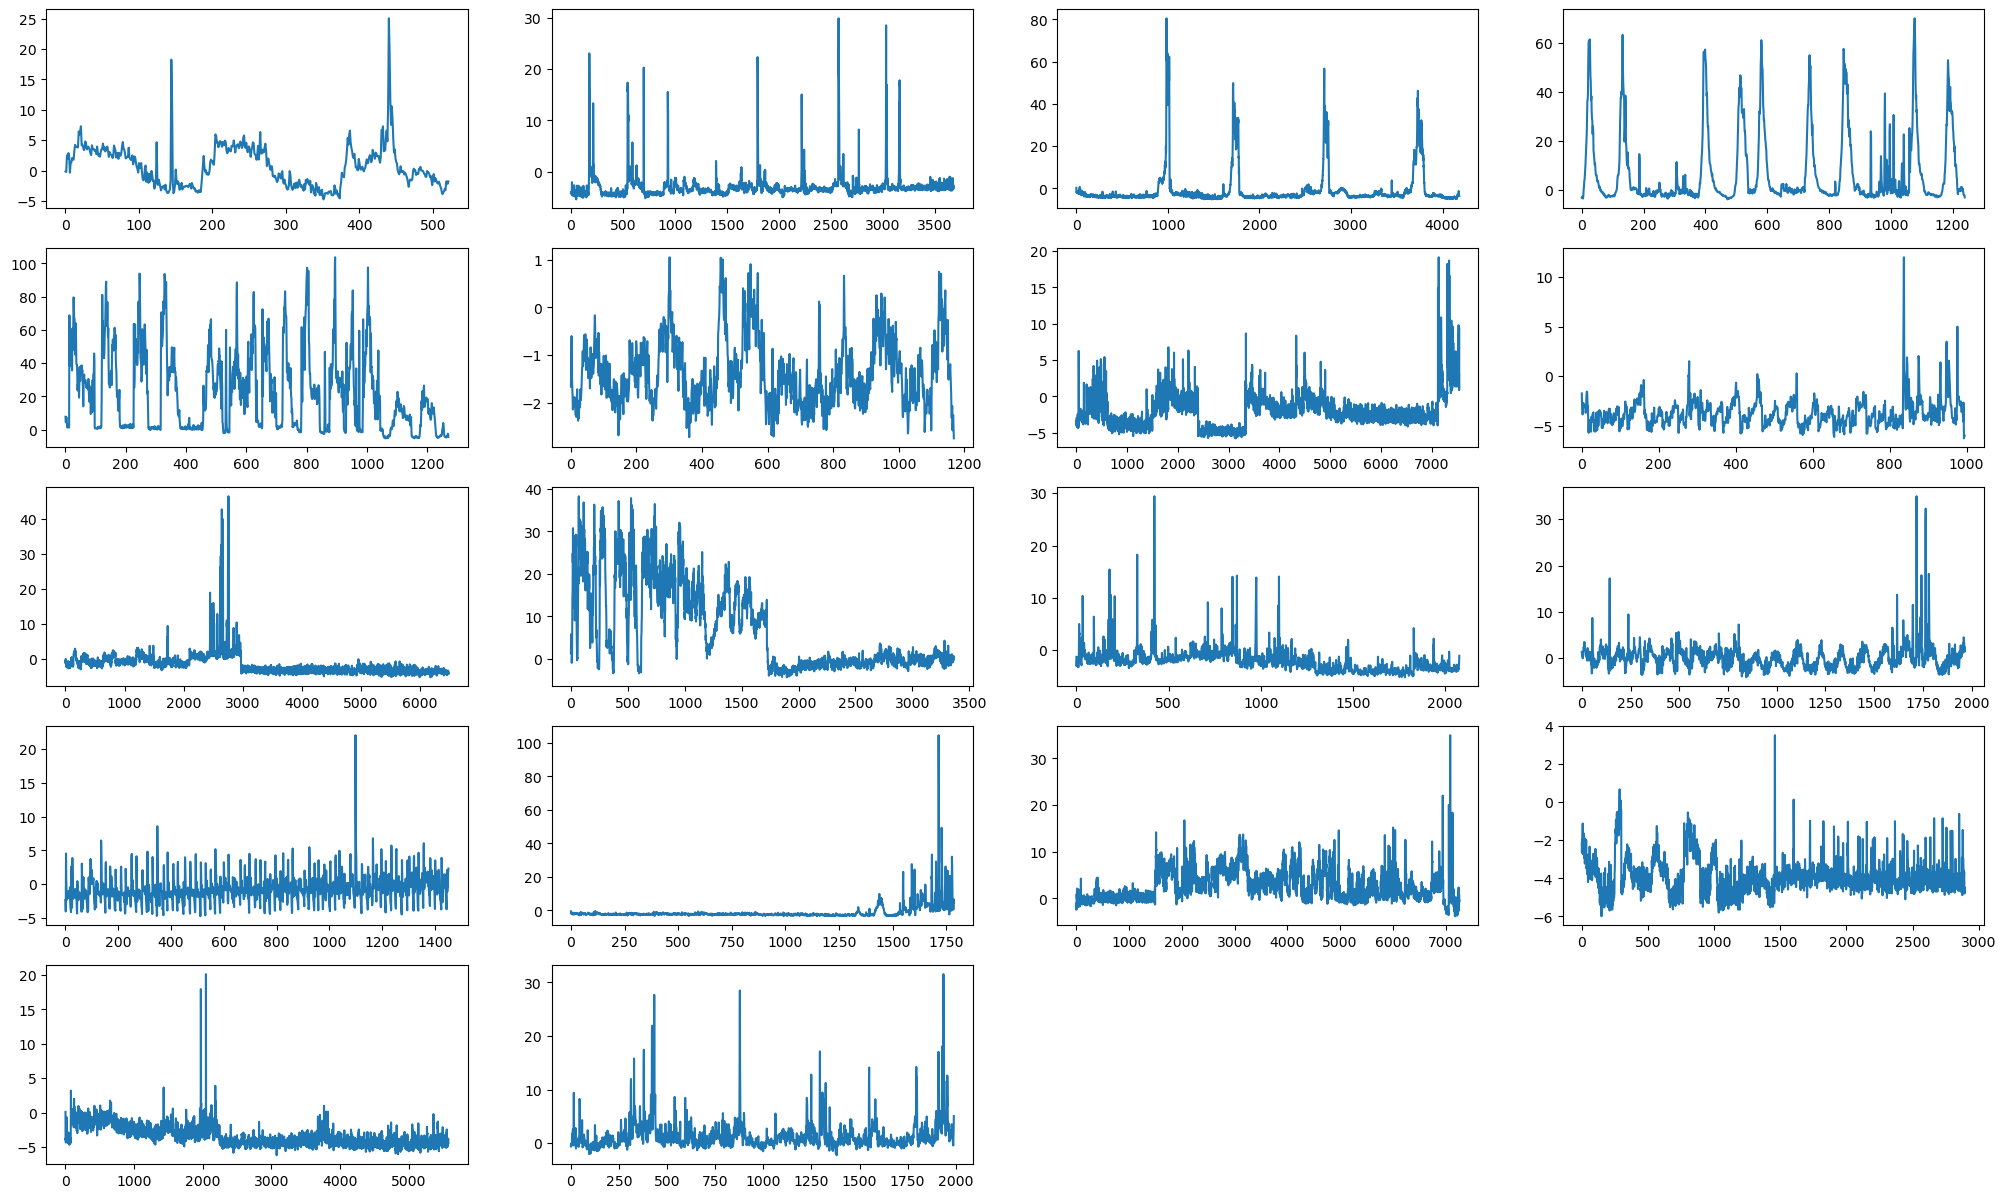

In [20]:
plt.figure(figsize=(25, 15))
for i in range(18):
    plt.subplot(5, 4, i+1)
    plt.plot(ts[i][:, 0])

In [21]:
ts = to_time_series_dataset(ts)

In [22]:
ts.shape

(18, 7541, 32)

<Axes: >

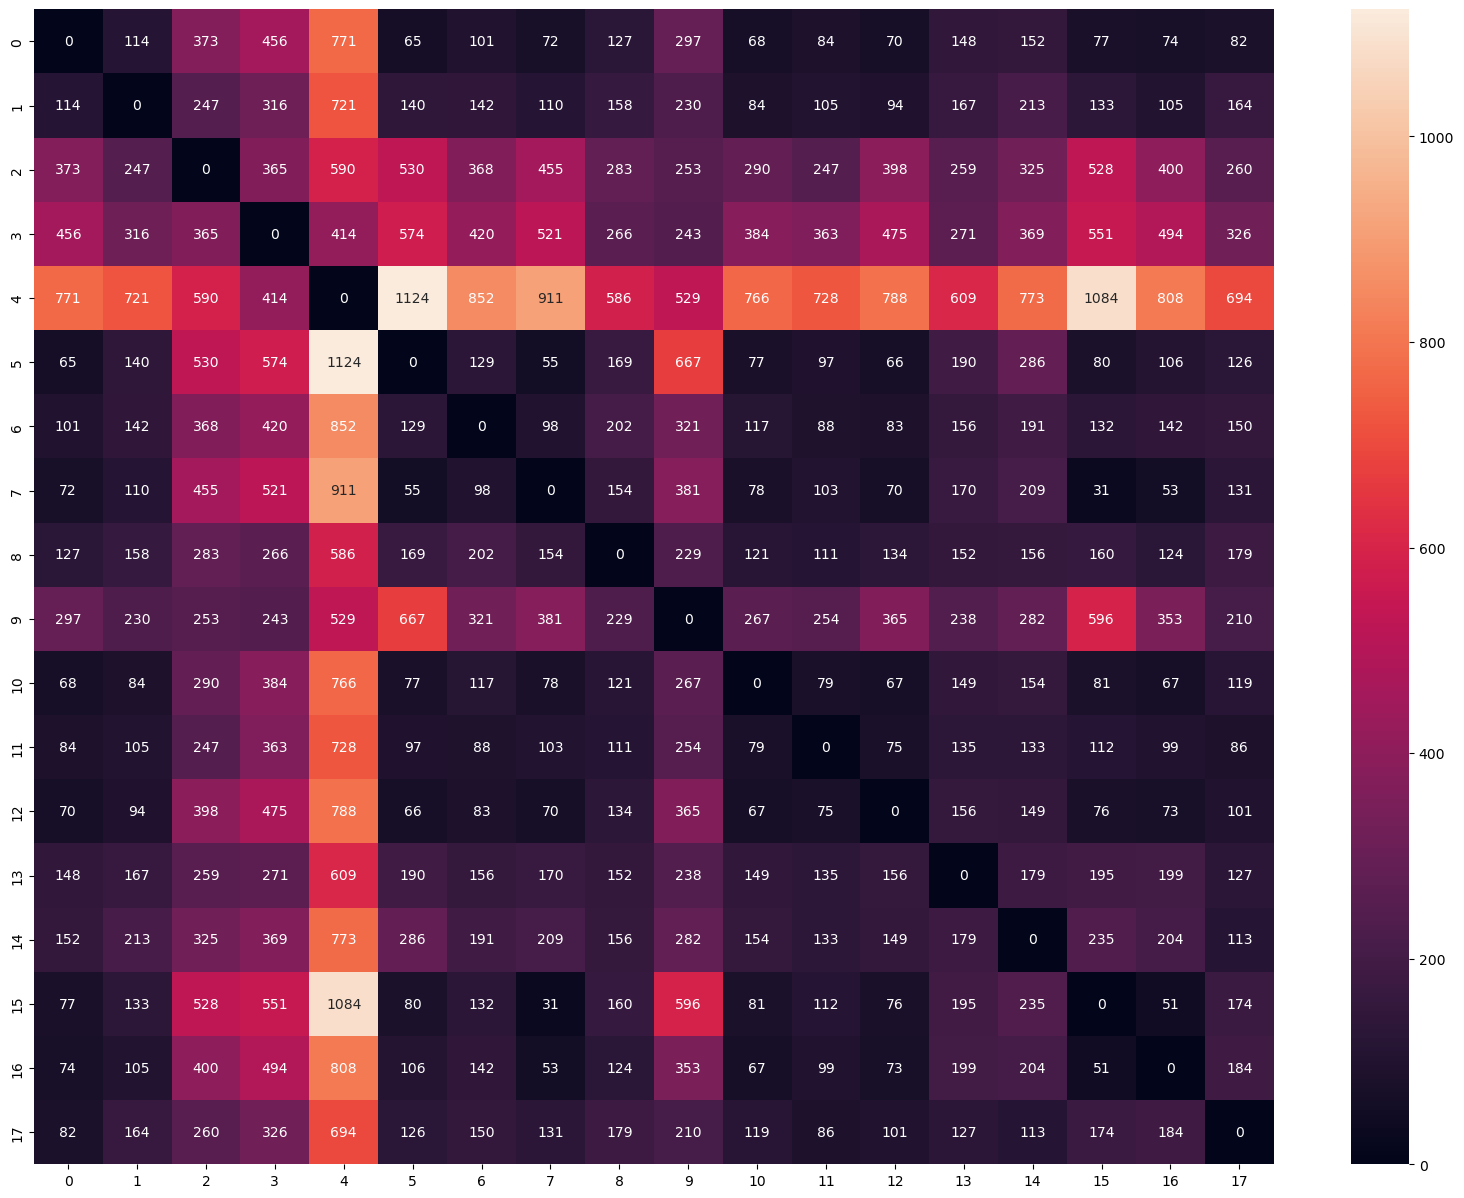

In [23]:
distance = np.zeros([18, 18])
for i in range(18):
    for j in range(i, 18):
        distance[i, j] = distance[j, i] = dtw(ts[i][:, 0], ts[j][:, 0])
plt.figure(figsize=(20, 15))
sns.heatmap(distance, annot=True, fmt='.0f')

In [24]:
n_clusters = 4
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=0, n_jobs=8)
y_pred = kmeans.fit_predict(ts)
print(y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:    8.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:    5.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:    3.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   19.2s finished


1174152.972 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   15.2s finished


342278.054 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   16.5s finished


342278.054 --> 


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    9.1s


[0 0 0 3 2 0 0 0 0 0 0 0 0 0 1 0 0 0]


[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   18.2s finished


In [25]:
from tslearn.clustering import silhouette_score
silhouette_score(ts, y_pred, metric="dtw")

0.21431088320737093

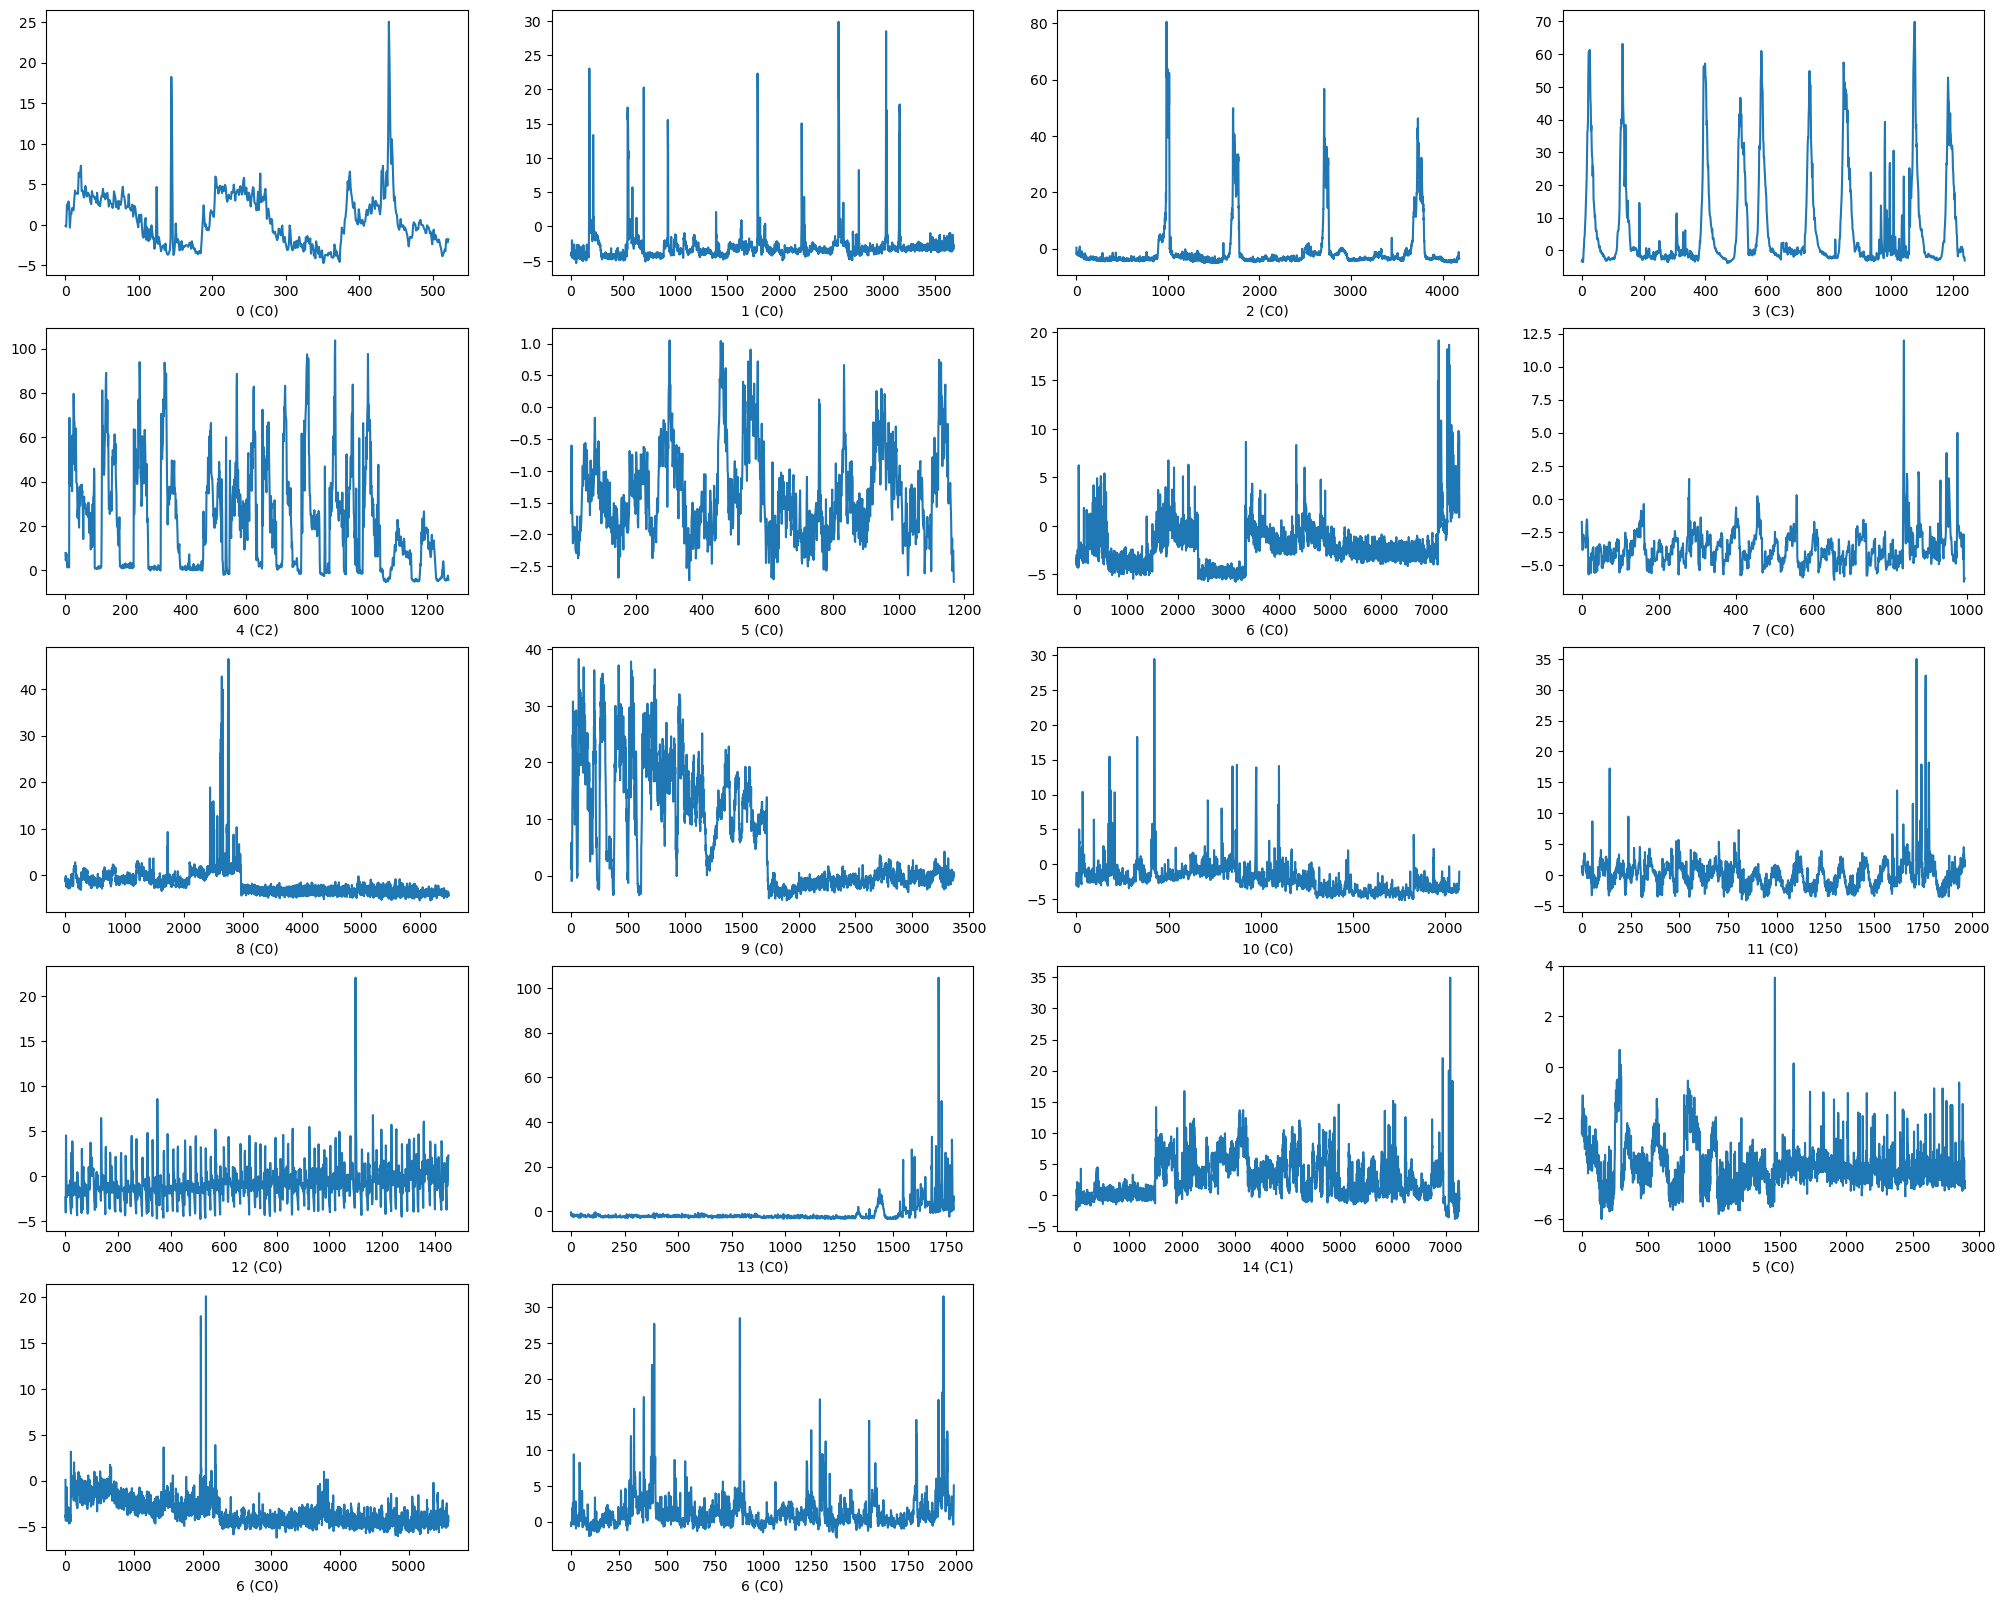

In [26]:
plt.figure(figsize=(25, 20))
for i in range(18):
    plt.subplot(5, 4, i+1)
    plt.plot(ts[i][:, 0])
    if i < 15:
        patient_idx_str = str(i)
    elif i==15:
        patient_idx_str = str(5)
    elif i==16:
        patient_idx_str = str(6)
    elif i==16:
        patient_idx_str = str(10)
    cluster_str = str(y_pred[i])
    plt.xlabel("{} (C{})".format(patient_idx_str, cluster_str))

In [28]:
from sklearn.decomposition import PCA

X = data.iloc[:, 2:].values
y = np.int32(data['annotation'].values)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The original number of training feature is:  360


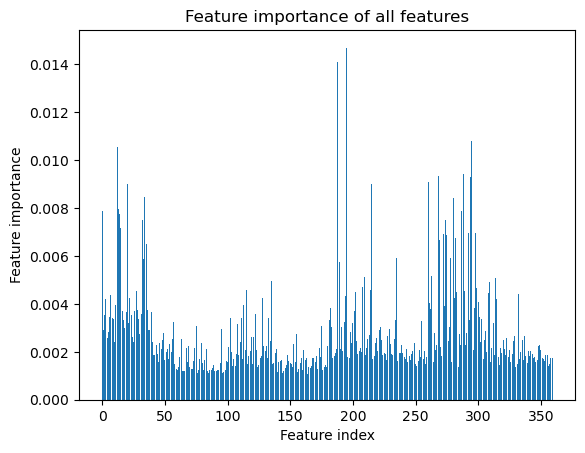

The current number of training feature after feature selection is:  120


In [29]:
from sklearn.ensemble import ExtraTreesClassifier
random_state = 42

print("The original number of training feature is: ", X_scaled.shape[-1])
clf_etc = ExtraTreesClassifier(random_state=random_state).fit(X_scaled, y) # fit the model
feature_importances = clf_etc.feature_importances_  # get the feature importance

plt.bar(range(len(feature_importances)), feature_importances)   # plot the feature importance
plt.xlabel("Feature index")
plt.ylabel("Feature importance")
plt.title("Feature importance of all features")
plt.show()

important_feature_indices=np.argsort(feature_importances)   # sort the feature importance  
important_feature_indices_cut=important_feature_indices[:int(len(important_feature_indices)/1.5)]   # select the most important features  

X_selected=np.delete(X_scaled,important_feature_indices_cut,1)    # delete the least important features
print("The current number of training feature after feature selection is: ", X_selected.shape[1])

In [30]:
ts = []
for i in range(15):
    ts.append(X_selected[data_list[i][0].index, :])
    
ts.append(X_selected[data_list[5][1].index, :])
ts.append(X_selected[data_list[6][1].index, :])
ts.append(X_selected[data_list[10][1].index, :])

ts = to_time_series_dataset(ts)

In [31]:
n_clusters = 4
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=0, n_jobs=8)
y_pred = kmeans.fit_predict(ts)
print(y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    2.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   15.6s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   31.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   22.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   10.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   30.0s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:  1.0min finished


661458.392 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   30.2s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:  1.0min finished


274979.190 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   30.0s
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:  1.0min finished


274979.190 --> 


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   28.8s


[0 0 0 0 3 0 0 0 0 2 0 0 0 1 1 0 0 0]


[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed:   58.9s finished


In [33]:
from tslearn.clustering import silhouette_score
silhouette_score(ts, y_pred, metric="dtw")

0.16003018359306054

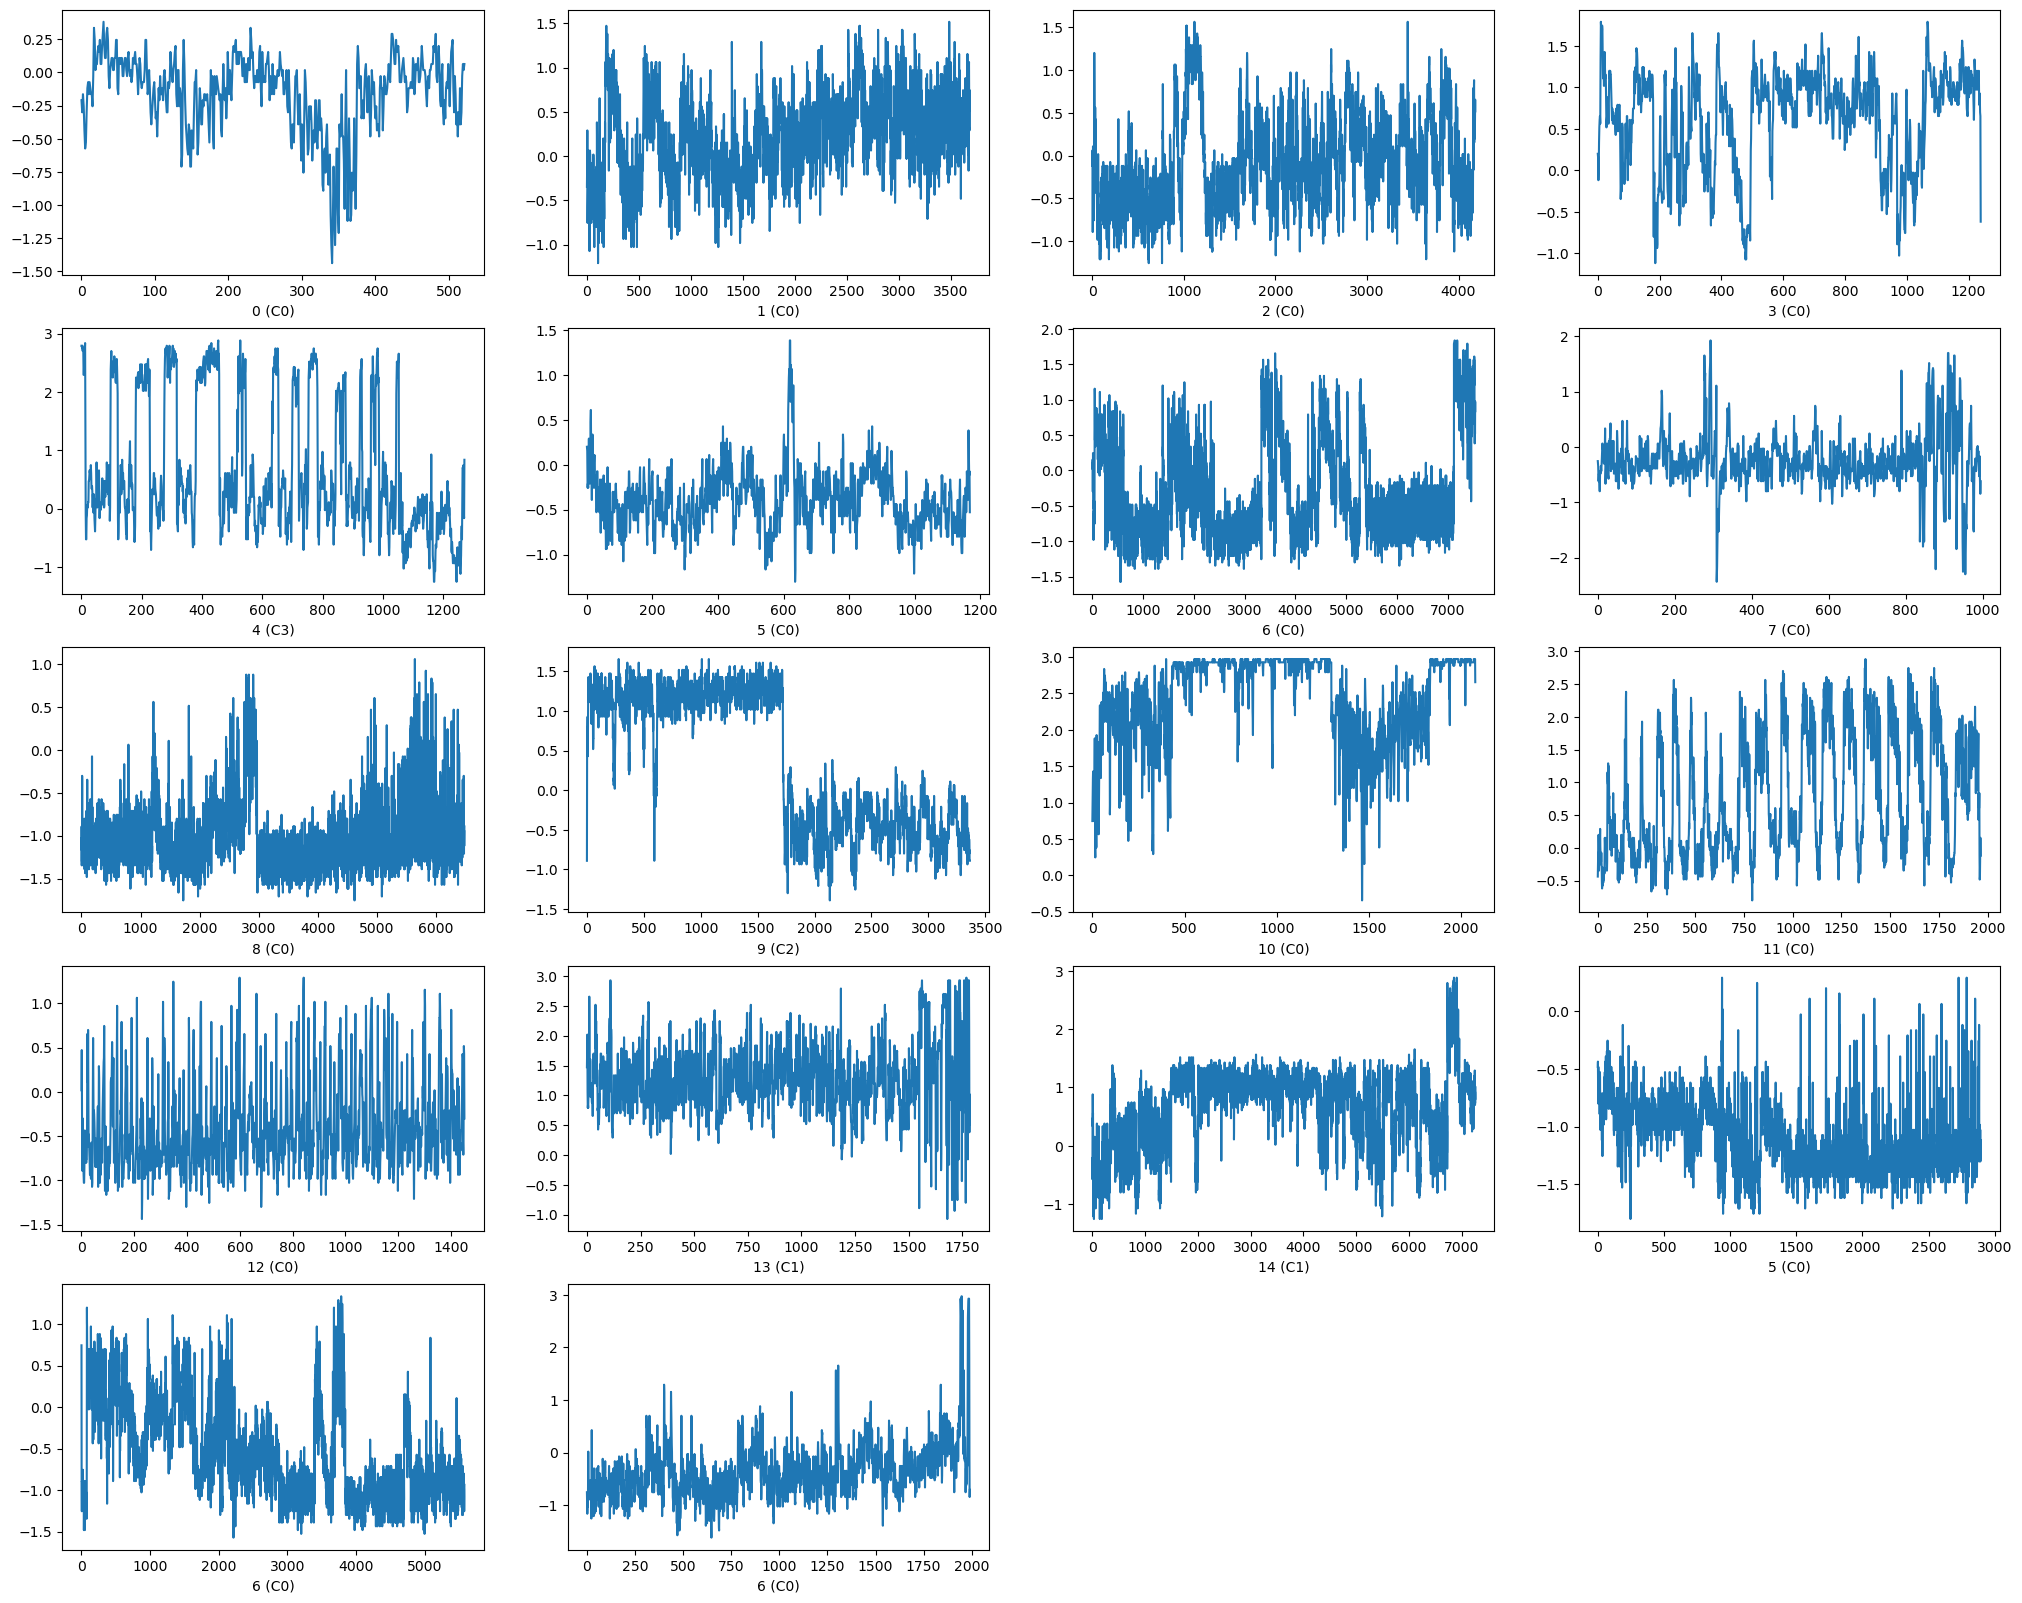

In [32]:
plt.figure(figsize=(25, 20))
for i in range(18):
    plt.subplot(5, 4, i+1)
    plt.plot(ts[i][:, 0])
    if i < 15:
        patient_idx_str = str(i)
    elif i==15:
        patient_idx_str = str(5)
    elif i==16:
        patient_idx_str = str(6)
    elif i==16:
        patient_idx_str = str(10)
    cluster_str = str(y_pred[i])
    plt.xlabel("{} (C{})".format(patient_idx_str, cluster_str))

In [34]:
n_clusters = 5
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=0, n_jobs=8)
y_pred = kmeans.fit_predict(ts)
print(y_pred)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:    3.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   15.1s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   29.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   21.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   10.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   14.1s
[Parallel(n_jobs=8)]: Done  54 out of  54 | elapsed:   25.6s finished
[Paral

598134.968 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   22.8s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:  1.3min finished


248952.768 --> 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   22.3s
[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:  1.3min finished


248952.768 --> 


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   21.5s


[0 0 0 0 3 0 0 0 4 2 0 0 0 1 1 0 4 0]


[Parallel(n_jobs=8)]: Done  90 out of  90 | elapsed:  1.2min finished


In [35]:
from tslearn.clustering import silhouette_score
silhouette_score(ts, y_pred, metric="dtw")

0.13663752980854463